In [1]:
import numpy as np
import pandas as pd

* 공공데이터를 사용해 아파트 가격을 예측해보는 것을 목표하고 있습니다.

In [2]:
df = pd.read_csv('주택도시보증공사_전국 신규 민간 아파트 분양가격 동향_20200331.csv')
df

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
연도,4590.0,2017.5,1.343856,2015.0,2016.0,2017.5,2019.0,2020.0
월,4590.0,6.5,3.594368,1.0,3.0,6.5,10.0,12.0


* 데이터의 모양을 살펴봅니다.

In [17]:
df.shape

(4590, 5)

In [18]:
df.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

* 컬럼명에 제곱미터가 컬럼명 입력할 때 오류가 나는 것 같아서 컬럼명을 바꿉니다.

In [5]:
df.columns=['지역명','규모구분','연도','월','분양가격']

* 분양가격에 널값이 314개 있어서 dropna를 사용해서 없앴습니다.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4590 non-null   object
 1   규모구분    4590 non-null   object
 2   연도      4590 non-null   int64 
 3   월       4590 non-null   int64 
 4   분양가격    4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [11]:
df.isnull().sum()

지역명     0
규모구분    0
연도      0
월       0
분양가격    0
dtype: int64

In [8]:
df=df.dropna()
df

,지역명,규모구분,연도,월,분양가격
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4583,경남,전용면적 85㎡초과 102㎡이하,2020,3,3247
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962


* 분양가격의 데이터타입을 수치형으로 바꾸기위해 공백이나 콤마가 있으면 없애려고 하는데, 데이터타입이 바뀌질 않아서 막힌 상태입니다.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4276 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     4276 non-null   object
 1   규모구분    4276 non-null   object
 2   연도      4276 non-null   int64 
 3   월       4276 non-null   int64 
 4   분양가격    4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 200.4+ KB


In [10]:
df['분양가격'].value_counts()

3395    18
2221    17
        16
2667    16
3226    15
        ..
3936     1
2102     1
6893     1
3665     1
4623     1
Name: 분양가격, Length: 1766, dtype: int64

In [25]:
df.분양가격.replace('  ','')

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4583    3247
4585    3955
4586    4039
4587    3962
4589    3601
Name: 분양가격, Length: 4276, dtype: object

In [29]:
df.분양가격.replace(',','')

0       5841
1       5652
2       5882
3       5721
4       5879
        ... 
4583    3247
4585    3955
4586    4039
4587    3962
4589    3601
Name: 분양가격, Length: 4276, dtype: object

In [31]:
int(df.분양가격)

TypeError: cannot convert the series to <class 'int'>

In [32]:
df.empty

False

In [48]:
df.isnull().sum()

지역명        0
규모구분       0
연도         0
월          0
분양가격(㎡)    0
dtype: int64

* 분양가격을 해결하고나면 그래프를 그리기 위해 불러옵니다.

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [49]:
df.values

array([['서울', '전체', 2015, 10, '5841'],
       ['서울', '전용면적 60㎡이하', 2015, 10, '5652'],
       ['서울', '전용면적 60㎡초과 85㎡이하', 2015, 10, '5882'],
       ...,
       ['제주', '전용면적 60㎡이하', 2020, 3, '4039'],
       ['제주', '전용면적 60㎡초과 85㎡이하', 2020, 3, '3962'],
       ['제주', '전용면적 102㎡초과', 2020, 3, '3601']], dtype=object)

array([[<AxesSubplot:title={'center':'연도'}>,
        <AxesSubplot:title={'center':'월'}>]], dtype=object)

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backen

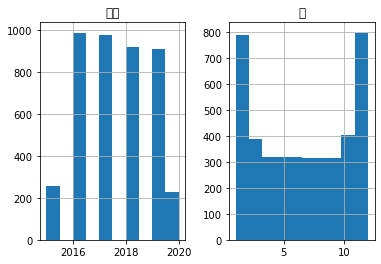

In [50]:
df.hist()

* 유니크를 알기 위해서 밸류 카운트를 사용했습니다.

In [51]:
df['지역명'].value_counts()

서울    270
부산    270
충북    270
경기    270
전북    267
인천    266
전남    266
경남    264
대구    261
강원    261
충남    258
경북    257
세종    254
제주    238
광주    225
대전    217
울산    162
Name: 지역명, dtype: int64

In [52]:
df['연도'].value_counts()

2016    988
2017    975
2018    919
2019    912
2015    255
2020    227
Name: 연도, dtype: int64

In [53]:
df['월'].value_counts()

10    405
11    401
1     396
12    396
2     391
3     388
5     318
4     318
6     317
9     316
7     315
8     315
Name: 월, dtype: int64

In [54]:
df['규모구분'].value_counts()

전용면적 60㎡초과 85㎡이하     909
전체                   909
전용면적 60㎡이하           860
전용면적 102㎡초과          848
전용면적 85㎡초과 102㎡이하    750
Name: 규모구분, dtype: int64

In [55]:
df[(df.규모구분=='전체')]

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
5,인천,전체,2015,10,3163
10,경기,전체,2015,10,3138
15,부산,전체,2015,10,3112
20,대구,전체,2015,10,2682
...,...,...,...,...,...
4565,전북,전체,2020,3,2468
4570,전남,전체,2020,3,2576
4575,경북,전체,2020,3,2555
4580,경남,전체,2020,3,2968


In [56]:
df[(df.규모구분=='전체')]

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
5,인천,전체,2015,10,3163
10,경기,전체,2015,10,3138
15,부산,전체,2015,10,3112
20,대구,전체,2015,10,2682
...,...,...,...,...,...
4565,전북,전체,2020,3,2468
4570,전남,전체,2020,3,2576
4575,경북,전체,2020,3,2555
4580,경남,전체,2020,3,2968


In [ ]:
df.columns=

In [57]:
df[(df.규모구분=='전체') & (df.지역명=='서울')]

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
85,서울,전체,2015,11,6050
170,서울,전체,2015,12,6041
255,서울,전체,2016,1,6108
340,서울,전체,2016,2,6111
425,서울,전체,2016,3,6173
510,서울,전체,2016,4,6241
595,서울,전체,2016,5,6264
680,서울,전체,2016,6,6208
765,서울,전체,2016,7,6254


<AxesSubplot:>

C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\LEE_JI_HYEOK_V2\anaconda3\lib\site-packages\matplotlib\backends\backen

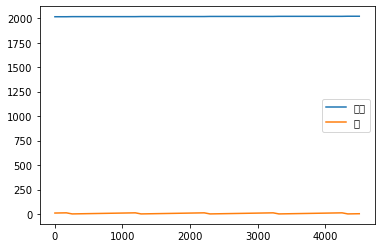

In [59]:
df[(df.규모구분=='전체') & (df.지역명=='서울')].plot()

In [88]:
df.groupby('지역명').mean()

,연도,월
지역명,,
강원,2017.536398,6.544061
경기,2017.500000,6.500000
경남,2017.454545,6.507576
경북,2017.459144,6.575875
광주,2017.368889,6.586667
대구,2017.505747,6.482759
대전,2017.405530,6.599078
부산,2017.500000,6.500000
서울,2017.500000,6.500000


In [82]:
df.columns

Index(['지역명', '규모구분', '연도', '월', '분양가격(㎡)'], dtype='object')

* 현재까지 진행중인 것까지 중간보고서로 제출하겠습니다. 
